<a href="https://colab.research.google.com/github/LeonardoHyppolito/DataTwitter-Eleitoral/blob/main/Etapa_4_An%C3%A1lise_de_Sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise de Sentimento  

In [1]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.0 MB/s 


In [72]:
#Importando Bibliotecas 
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

#Processamento de Linguagem Natural
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [73]:
# Importando csv 
df_sentimento = pd.read_csv('df_todos_candidatos_pronto_para_sentimento.csv')

In [74]:
#Primeira Visualização 
df_sentimento.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet-limpo
0,2022-08-03 13:14:03+00:00,1554817875348709378,@jairbolsonaro #ForaBolsonaroVagabundo https:/...,BOLSONARO,
1,2022-08-03 13:14:02+00:00,1554817871632637958,@LulaOficial BOLSONARO 2022 🇧🇷🇧🇷🇧🇷,BOLSONARO,bolsonaro 2022 🇧🇷🇧🇷🇧🇷
2,2022-08-03 13:14:01+00:00,1554817867060858880,@PauloMartins10 Bolsonaro provoca crises com o...,BOLSONARO,bolsonaro provoca crises com o stf/tse e cont...
3,2022-08-03 13:14:01+00:00,1554817865877954562,@senadorhumberto @LulaOficial Vocês podem e de...,BOLSONARO,vocês podem e devem tentar como sempre fazem...
4,2022-08-03 13:14:00+00:00,1554817861838946304,"@RomildoConceio5 @jairbolsonaro cara, ""orrivel...",BOLSONARO,"cara, ""orrivel e desastrador"" é o seu portug..."


In [36]:
analisador_de_texto = SentimentIntensityAnalyzer() # Agora analisador de texto executa todas as funções que SentimentIntensityAnalyzer() é capaz de executar

In [83]:

df_sentimento['Sentimentos'] = df_sentimento['Tweet-limpo'].astype(str).apply(lambda i: analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))


In [84]:
df_sentimento.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet-limpo,Sentimentos
0,2022-08-03 13:14:03+00:00,1554817875348709378,@jairbolsonaro #ForaBolsonaroVagabundo https:/...,BOLSONARO,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
1,2022-08-03 13:14:02+00:00,1554817871632637958,@LulaOficial BOLSONARO 2022 🇧🇷🇧🇷🇧🇷,BOLSONARO,bolsonaro 2022 🇧🇷🇧🇷🇧🇷,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-08-03 13:14:01+00:00,1554817867060858880,@PauloMartins10 Bolsonaro provoca crises com o...,BOLSONARO,bolsonaro provoca crises com o stf/tse e cont...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-08-03 13:14:01+00:00,1554817865877954562,@senadorhumberto @LulaOficial Vocês podem e de...,BOLSONARO,vocês podem e devem tentar como sempre fazem...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-08-03 13:14:00+00:00,1554817861838946304,"@RomildoConceio5 @jairbolsonaro cara, ""orrivel...",BOLSONARO,"cara, ""orrivel e desastrador"" é o seu portug...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [85]:
df_sentimento['Sentimentos']

0      {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
607    {'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...
608    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
609    {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
610    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
611    {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...
Name: Sentimentos, Length: 612, dtype: object

In [86]:
df_sentimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data_Hora    612 non-null    object
 1   Id_Tweet     612 non-null    int64 
 2   Tweet        612 non-null    object
 3   Candidato    612 non-null    object
 4   Tweet-limpo  611 non-null    object
 5   Sentimentos  612 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.8+ KB


In [87]:
df_sentimento['Sentimentos'].describe()

count                                                   612
unique                                                   92
top       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
freq                                                    467
Name: Sentimentos, dtype: object

In [88]:
df_sentimento['Positivo'] = df_sentimento['Sentimentos'].apply(lambda  i: i['pos'])
df_sentimento['Negativo'] = df_sentimento['Sentimentos'].apply(lambda  i: i['neg'])
df_sentimento['Neutro'] = df_sentimento['Sentimentos'].apply(lambda  i: i['neu'])
df_sentimento['Composicao'] = df_sentimento['Sentimentos'].apply(lambda  i: i['compound'])

In [96]:
df_sentimento.head(5)

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet-limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao
0,2022-08-03 13:14:03+00:00,1554817875348709378,@jairbolsonaro #ForaBolsonaroVagabundo https:/...,BOLSONARO,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0
1,2022-08-03 13:14:02+00:00,1554817871632637958,@LulaOficial BOLSONARO 2022 🇧🇷🇧🇷🇧🇷,BOLSONARO,bolsonaro 2022 🇧🇷🇧🇷🇧🇷,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
2,2022-08-03 13:14:01+00:00,1554817867060858880,@PauloMartins10 Bolsonaro provoca crises com o...,BOLSONARO,bolsonaro provoca crises com o stf/tse e cont...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
3,2022-08-03 13:14:01+00:00,1554817865877954562,@senadorhumberto @LulaOficial Vocês podem e de...,BOLSONARO,vocês podem e devem tentar como sempre fazem...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
4,2022-08-03 13:14:00+00:00,1554817861838946304,"@RomildoConceio5 @jairbolsonaro cara, ""orrivel...",BOLSONARO,"cara, ""orrivel e desastrador"" é o seu portug...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0


In [91]:
# Criando uma Lista para armazenar os sentimentos 
sentimento = []

In [98]:
for i in df_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):# Lembre de colocar parenteses nos valores negativos. 
     sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')
    

In [102]:
sentimento

['Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Positivo',
 'Negativo',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neg

In [105]:
len(sentimento)

612

In [103]:
# Criando  a coluna sentimento final, baseada nas regras. 
df_sentimento['Sentimento_Final'] = sentimento

In [113]:
# Visualização
df_sentimento.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet-limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-08-03 13:14:03+00:00,1554817875348709378,@jairbolsonaro #ForaBolsonaroVagabundo https:/...,BOLSONARO,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro
1,2022-08-03 13:14:02+00:00,1554817871632637958,@LulaOficial BOLSONARO 2022 🇧🇷🇧🇷🇧🇷,BOLSONARO,bolsonaro 2022 🇧🇷🇧🇷🇧🇷,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-08-03 13:14:01+00:00,1554817867060858880,@PauloMartins10 Bolsonaro provoca crises com o...,BOLSONARO,bolsonaro provoca crises com o stf/tse e cont...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-08-03 13:14:01+00:00,1554817865877954562,@senadorhumberto @LulaOficial Vocês podem e de...,BOLSONARO,vocês podem e devem tentar como sempre fazem...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-08-03 13:14:00+00:00,1554817861838946304,"@RomildoConceio5 @jairbolsonaro cara, ""orrivel...",BOLSONARO,"cara, ""orrivel e desastrador"" é o seu portug...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


In [114]:
# Análise Rápida da nova coluna
df_sentimento['Sentimento_Final'].value_counts() # Há muitos neutros errados. Seria legal corrigir !!!!!

Neutro      491
Negativo     83
Positivo     38
Name: Sentimento_Final, dtype: int64

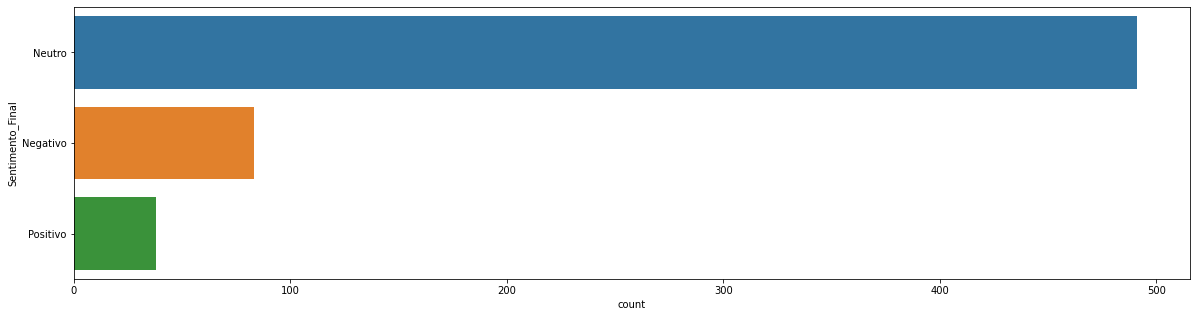

In [112]:
# Chamando as bibliotecas de visualização para plotar um gráfico da coluna que criamos. 
plt.figure(figsize=(20, 5))
sns.countplot(y='Sentimento_Final', data= df_sentimento) # Novamente, é possível ver muitos neutros, o que nitidamente é um erro. Isso nos da um caminho a ser seguido no final do projeto. 

###  Lula

In [115]:
# Faz mais sentido analisar cada candidato separadamente
sentimento_lula = df_sentimento[df_sentimento['Candidato'] == 'LULA']

In [127]:
# Df so com os dados do lula. 
sentimento_lula.head(2)

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet-limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
204,2022-08-03 13:14:13+00:00,1554817917069524992,@senadorhumberto @LulaOficial Aí você caiu da ...,LULA,aí você caiu da cama e acordou kkkkkk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
205,2022-08-03 13:14:12+00:00,1554817914301304832,@senadorhumberto @LulaOficial 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,LULA,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro


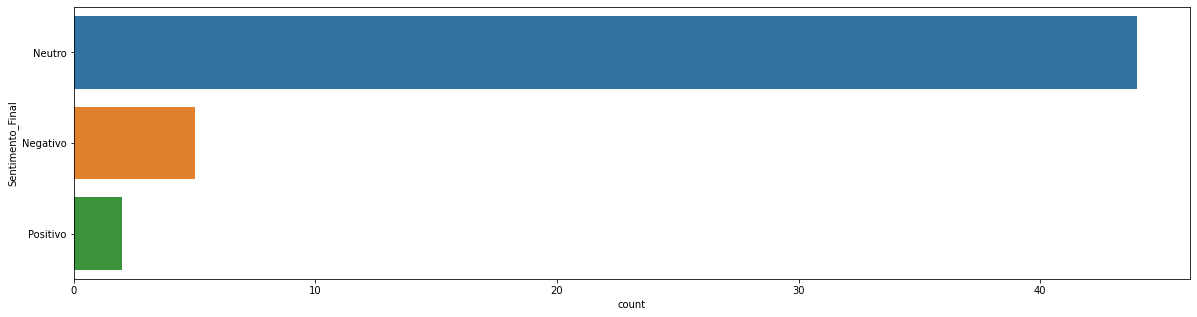

In [116]:
plt.figure(figsize=(20, 5))
sns.countplot(y='Sentimento_Final', data= sentimento_lula)

### Bolsonaro 

In [125]:
sentimento_bolsonaro = df_sentimento[df_sentimento['Candidato'] == 'BOLSONARO']
sentimento_bolsonaro.head(2)

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet-limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-08-03 13:14:03+00:00,1554817875348709378,@jairbolsonaro #ForaBolsonaroVagabundo https:/...,BOLSONARO,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro
1,2022-08-03 13:14:02+00:00,1554817871632637958,@LulaOficial BOLSONARO 2022 🇧🇷🇧🇷🇧🇷,BOLSONARO,bolsonaro 2022 🇧🇷🇧🇷🇧🇷,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


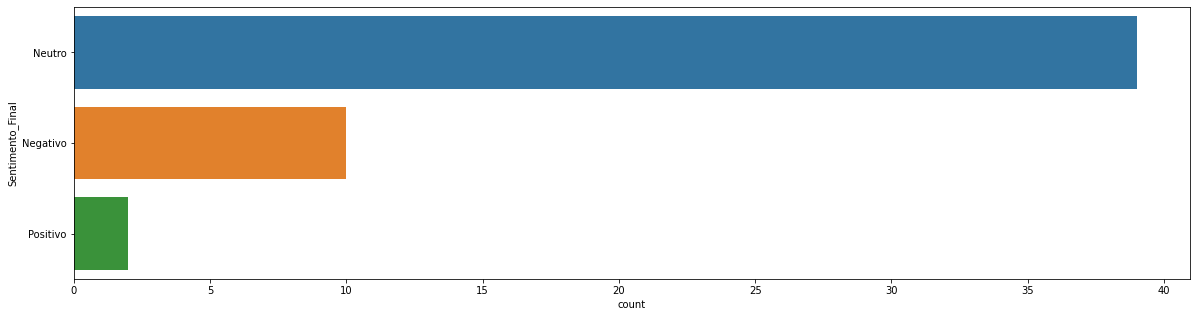

In [120]:
plt.figure(figsize=(20, 5))
sns.countplot(y='Sentimento_Final', data= sentimento_bolsonaro)

### Ciro Gomes

In [121]:
# Filtrando o Ciro 
sentimento_ciro = df_sentimento[df_sentimento['Candidato'] == 'CIRO GOMES']

In [124]:
sentimento_ciro.head(2)

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet-limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
102,2022-08-03 13:14:21+00:00,1554817952024772610,@keynes_de @cirogomes Muita razão,CIRO GOMES,muita razão,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
103,2022-08-03 13:14:18+00:00,1554817940058521600,@cirogomes @umadaniela *governado 😬,CIRO GOMES,*governado 😬,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


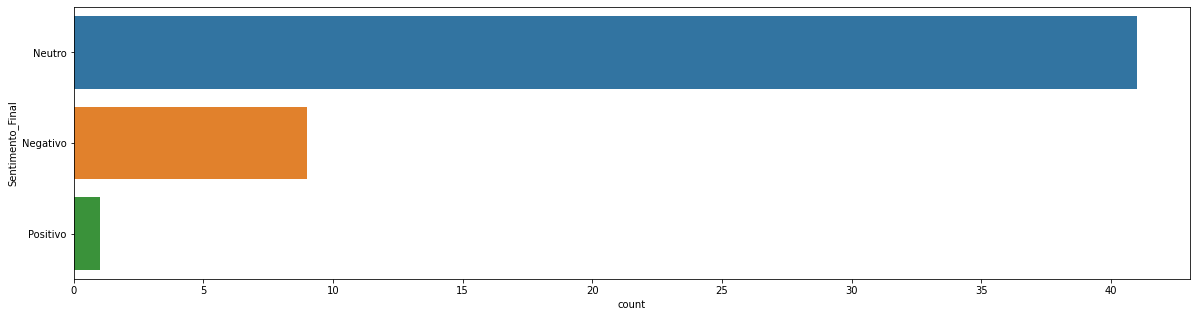

In [122]:
plt.figure(figsize=(20, 5))
sns.countplot(y='Sentimento_Final', data= sentimento_ciro)

### Limpando o df


In [128]:
df_sentimento.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet-limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-08-03 13:14:03+00:00,1554817875348709378,@jairbolsonaro #ForaBolsonaroVagabundo https:/...,BOLSONARO,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro
1,2022-08-03 13:14:02+00:00,1554817871632637958,@LulaOficial BOLSONARO 2022 🇧🇷🇧🇷🇧🇷,BOLSONARO,bolsonaro 2022 🇧🇷🇧🇷🇧🇷,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-08-03 13:14:01+00:00,1554817867060858880,@PauloMartins10 Bolsonaro provoca crises com o...,BOLSONARO,bolsonaro provoca crises com o stf/tse e cont...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-08-03 13:14:01+00:00,1554817865877954562,@senadorhumberto @LulaOficial Vocês podem e de...,BOLSONARO,vocês podem e devem tentar como sempre fazem...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-08-03 13:14:00+00:00,1554817861838946304,"@RomildoConceio5 @jairbolsonaro cara, ""orrivel...",BOLSONARO,"cara, ""orrivel e desastrador"" é o seu portug...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


In [135]:
df_final = df_sentimento[["Data_Hora","Id_Tweet","Tweet","Candidato","Tweet-limpo","Sentimento_Final"]]

In [136]:
df_final.head()

,Data_Hora,Id_Tweet,Tweet,Candidato,Tweet-limpo,Sentimento_Final
0,2022-08-03 13:14:03+00:00,1554817875348709378,@jairbolsonaro #ForaBolsonaroVagabundo https:/...,BOLSONARO,,Neutro
1,2022-08-03 13:14:02+00:00,1554817871632637958,@LulaOficial BOLSONARO 2022 🇧🇷🇧🇷🇧🇷,BOLSONARO,bolsonaro 2022 🇧🇷🇧🇷🇧🇷,Neutro
2,2022-08-03 13:14:01+00:00,1554817867060858880,@PauloMartins10 Bolsonaro provoca crises com o...,BOLSONARO,bolsonaro provoca crises com o stf/tse e cont...,Neutro
3,2022-08-03 13:14:01+00:00,1554817865877954562,@senadorhumberto @LulaOficial Vocês podem e de...,BOLSONARO,vocês podem e devem tentar como sempre fazem...,Neutro
4,2022-08-03 13:14:00+00:00,1554817861838946304,"@RomildoConceio5 @jairbolsonaro cara, ""orrivel...",BOLSONARO,"cara, ""orrivel e desastrador"" é o seu portug...",Neutro


In [137]:
# df da etapa 3 
df_final.to_csv('df_final', sep=',', index= False)